<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/ENCRYPTIX/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Exploration and Cleaning

In [ ]:
# Load the Titanic dataset to inspect its contents
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows and summary of the dataset to understand its structure
titanic_data_info = titanic_data.info()
titanic_data_head = titanic_data.head()

titanic_data_info, titanic_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

In [ ]:
# Set style for visualization
sns.set(style="whitegrid")

### Exploratory Data Analysis (EDA)

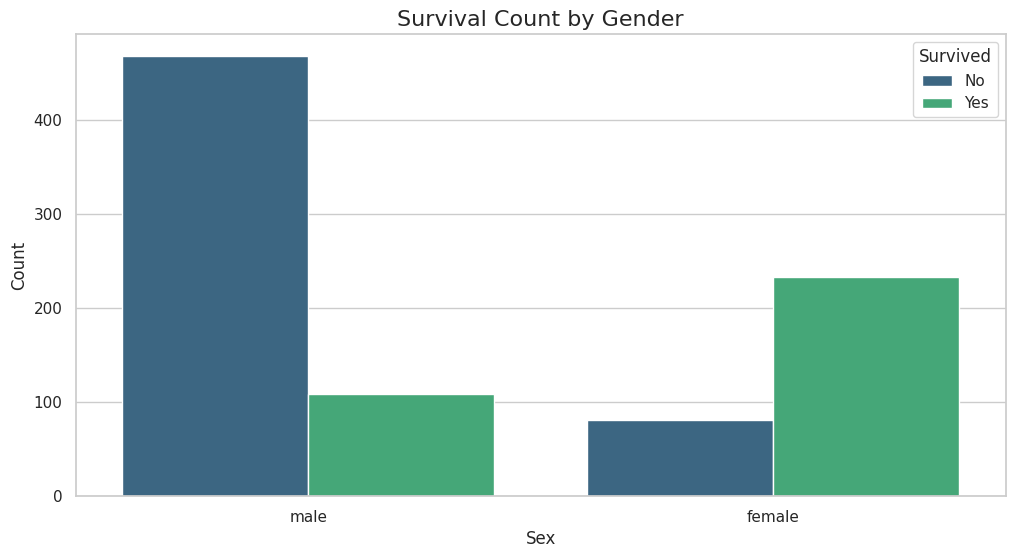

In [ ]:
# Step 1: Visualize survival rate by Sex
plt.figure(figsize=(12, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Count by Gender', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

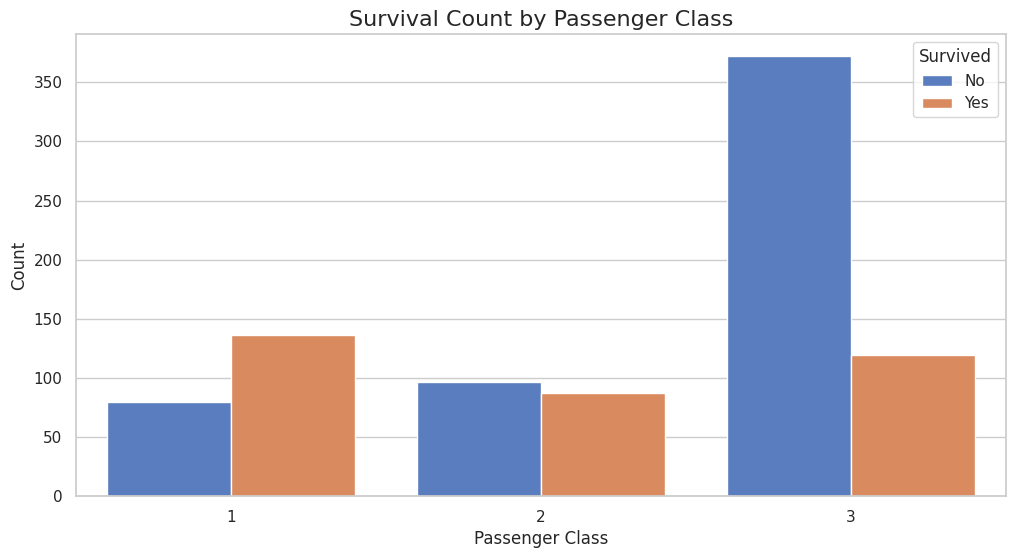

In [ ]:
# Step 2: Visualize survival rate by Pclass
plt.figure(figsize=(12, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='muted')
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

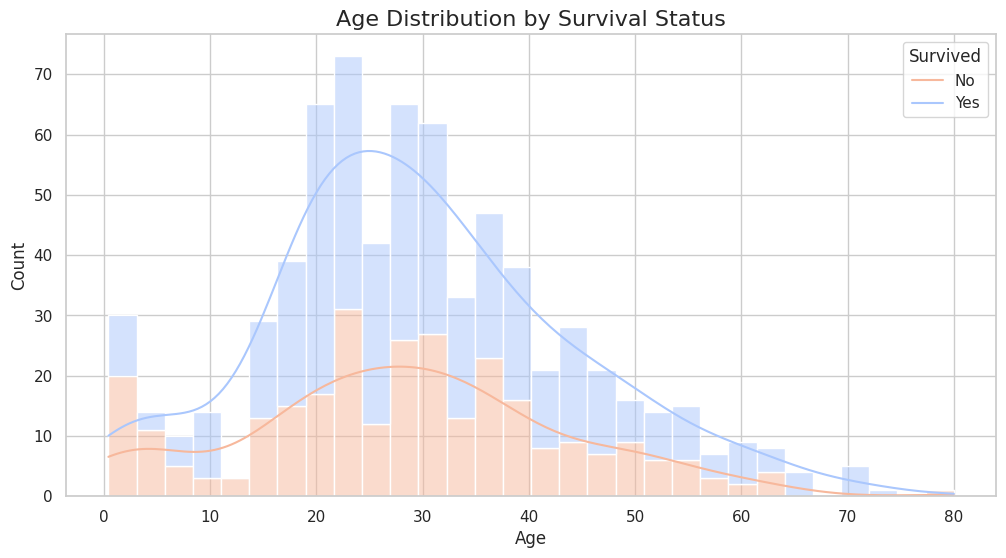

In [ ]:
# Step 3: Age distribution and survival
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', kde=True, bins=30, palette='coolwarm')
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

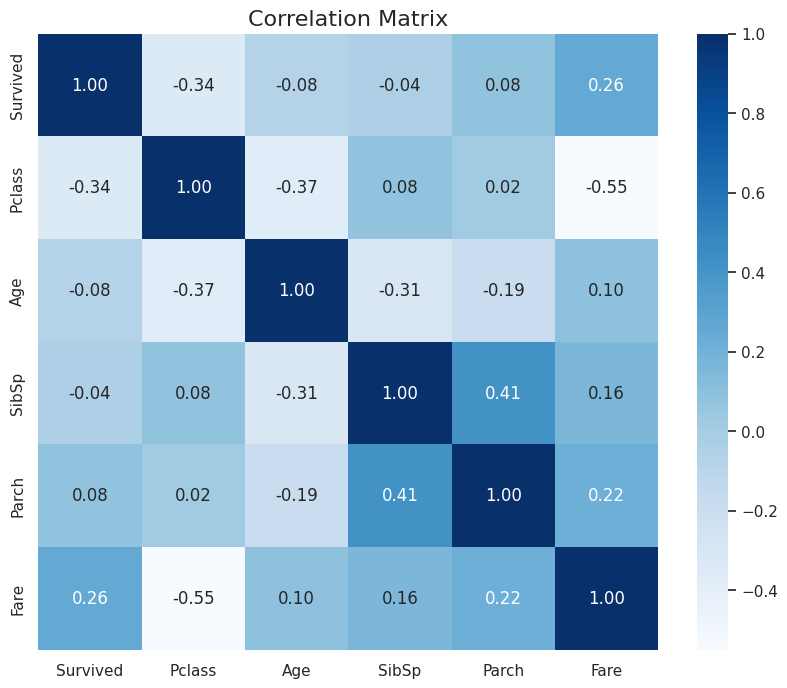

In [ ]:
# Step 4: Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()


### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Handle missing values
# Fill missing 'Age' with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
# Fill missing 'Embarked' with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# Step 2: Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic_data[column] = le.fit_transform(titanic_data[column])
    label_encoders[column] = le

In [ ]:
# Step 3: Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']


In [ ]:

# Step 4: Standardize numerical features
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check prepared data
X_train.head(), y_train.head()


(     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
 331       1    1  1.240235      0      0 -0.074583         2
 733       2    1 -0.488887      0      0 -0.386671         2
 382       3    1  0.202762      0      0 -0.488854         2
 704       3    1 -0.258337      1      0 -0.490280         2
 813       3    0 -1.795334      4      2 -0.018709         2,
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64)

### Model Development

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 1: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:

# Step 2: Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix

(0.8156424581005587,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       105\n           1       0.80      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.80      0.81       179\nweighted avg       0.81      0.82      0.81       179\n',
 array([[91, 14],
        [19, 55]]))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Model Evaluation

In [ ]:
# 1. Tuning Hyperparameter menggunakan GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.8272136314389836


In [ ]:
# 2. Evaluasi Model dengan Parameter Terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



### Results Interpretation & Recommendation

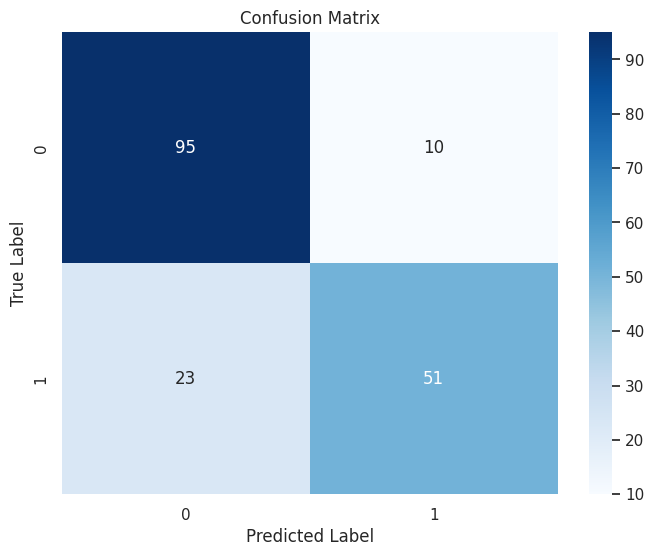

In [ ]:
# 3. Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

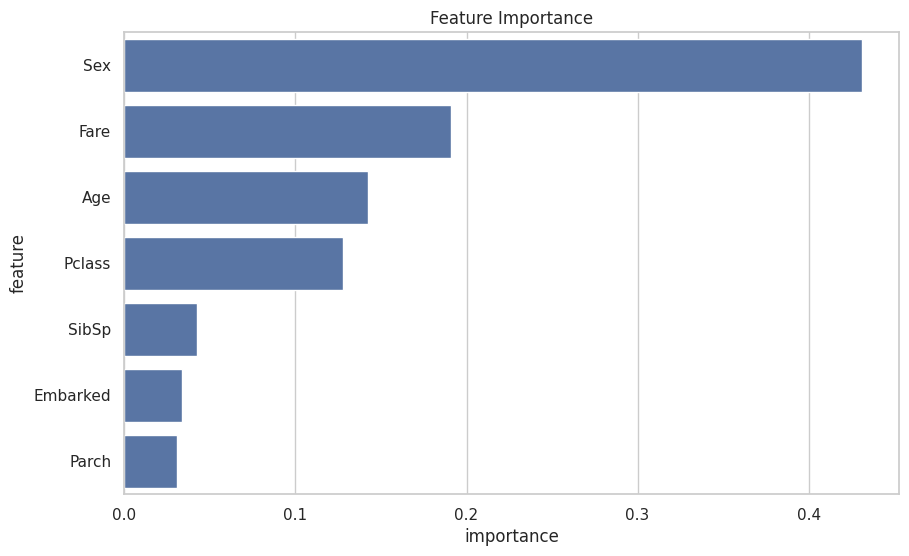

In [ ]:
# 4. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

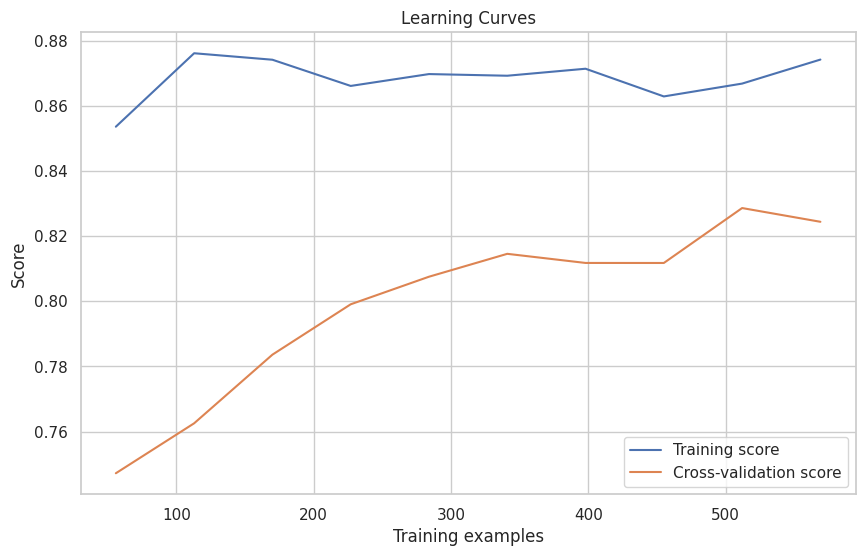

In [ ]:
# 5. Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

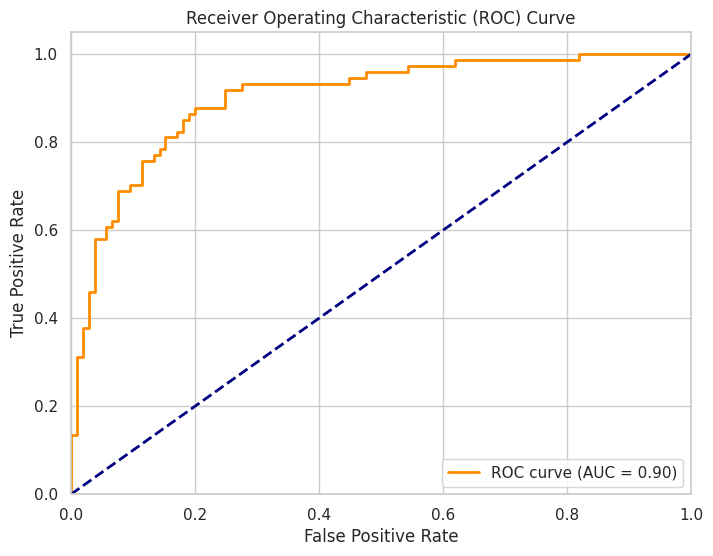

In [ ]:
from sklearn.metrics import roc_curve, auc

# 1. Visualisasi ROC Curve
plt.figure(figsize=(8, 6))
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 2. Feature Impact Analysis
def plot_feature_impact(feature_name, model, X, y):
    plt.figure(figsize=(10, 6))
    feature_values = X[feature_name]
    probabilities = model.predict_proba(X)[:, 1]

    plt.scatter(feature_values, probabilities, alpha=0.5)
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Survival')
    plt.title(f'Impact of {feature_name} on Survival Probability')
    plt.grid(True)
    plt.show()

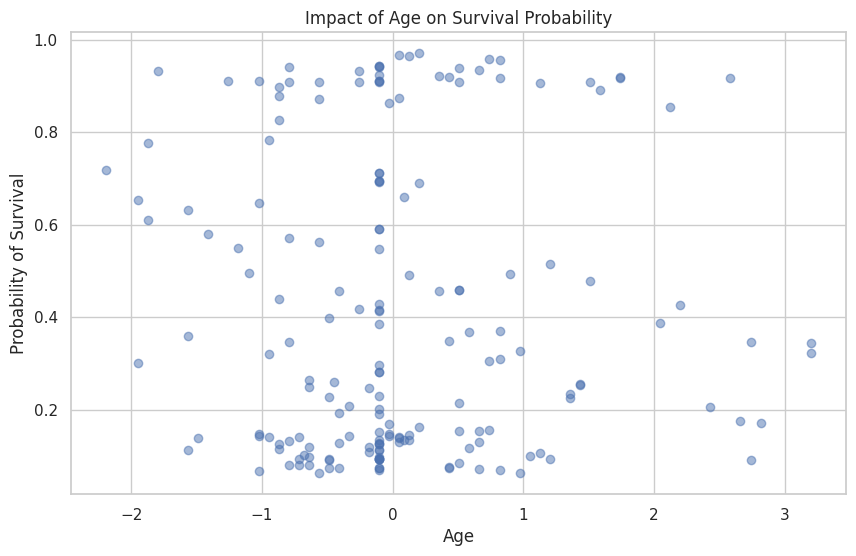

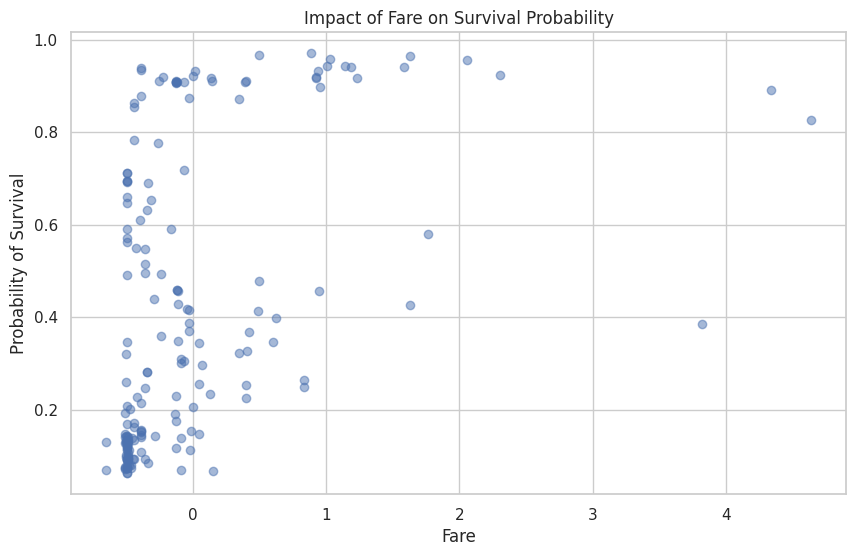

In [ ]:
# Plot impact for numerical features
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plot_feature_impact(feature, best_model, X_test, y_test)

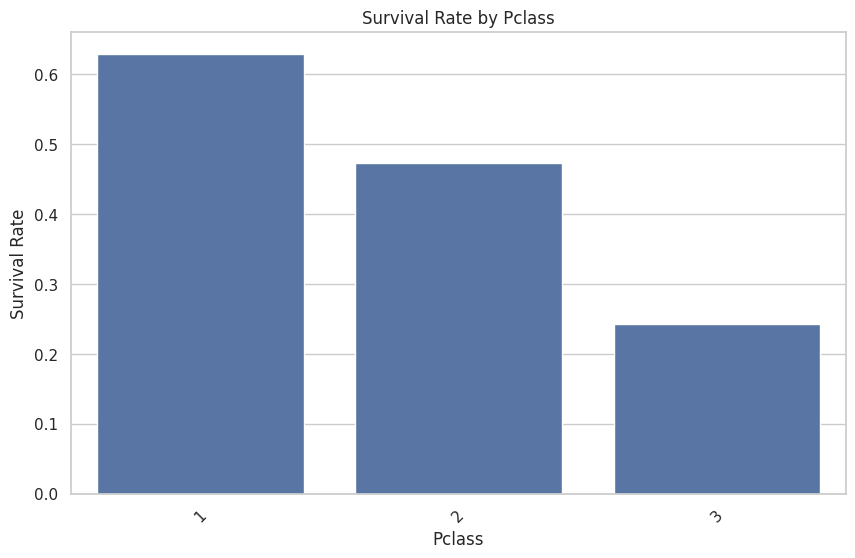

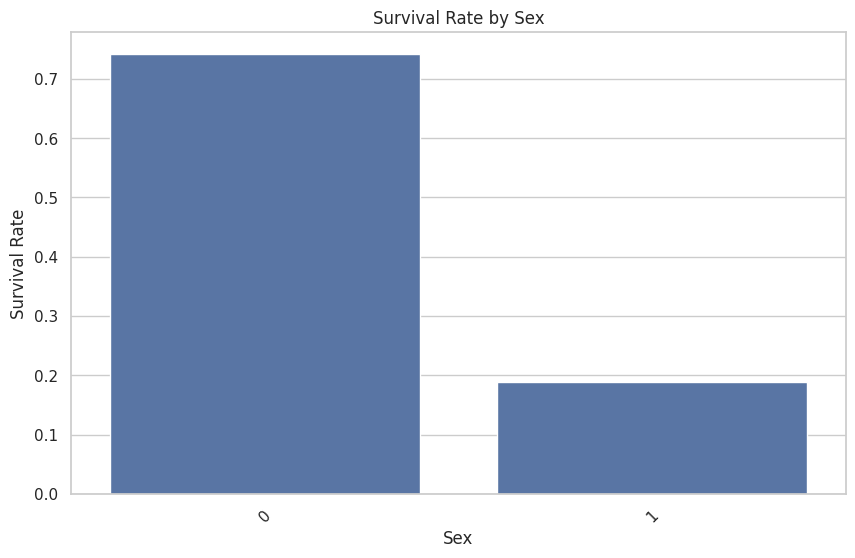

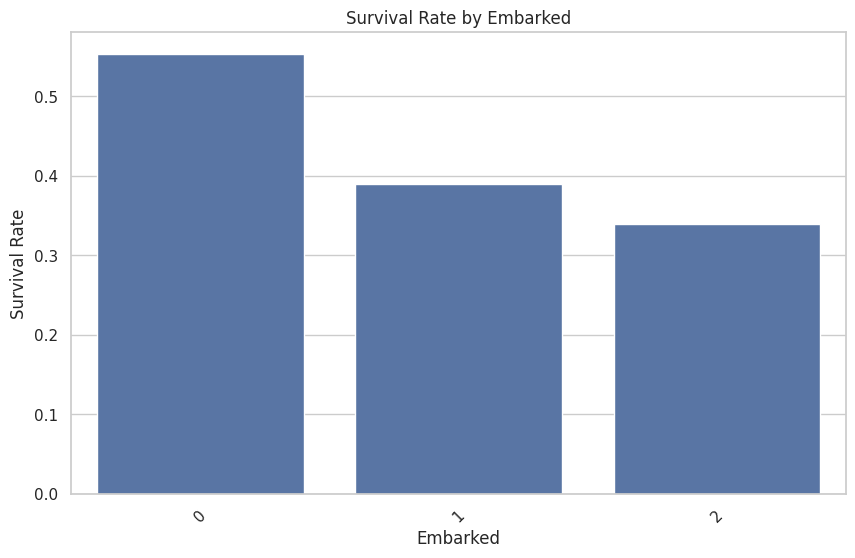

In [ ]:
# 3. Survival Rate Analysis by Categories
def plot_survival_rate_by_category(data, category, target='Survived'):
    plt.figure(figsize=(10, 6))
    survival_rates = data.groupby(category)[target].mean().sort_values(ascending=False)

    sns.barplot(x=survival_rates.index, y=survival_rates.values)
    plt.title(f'Survival Rate by {category}')
    plt.xlabel(category)
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=45)
    plt.show()
    categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plot_survival_rate_by_category(titanic_data, feature)

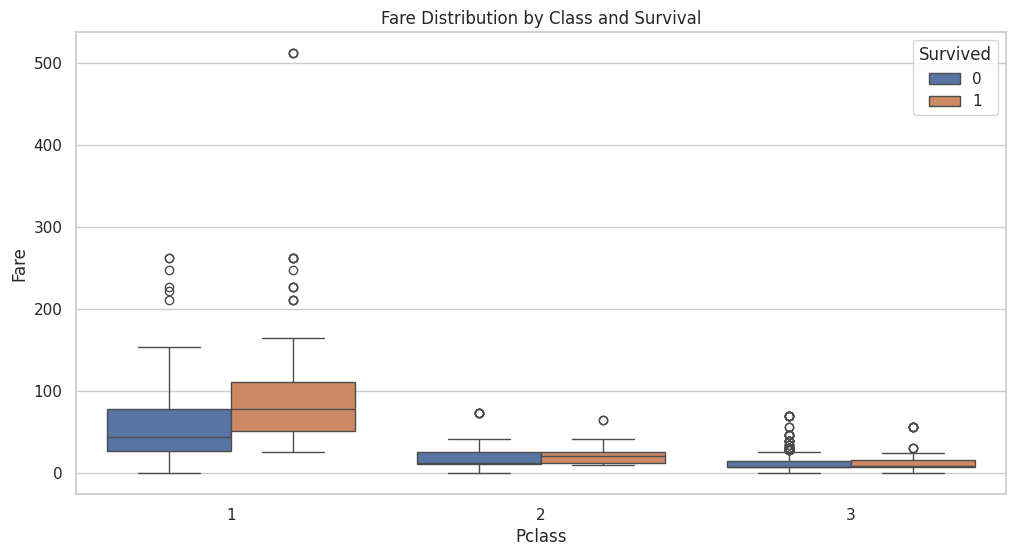

In [ ]:
# 4. Interaction Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_data)
plt.title('Fare Distribution by Class and Survival')
plt.show()

In [ ]:
# 5. Summary Statistics
summary_stats = pd.DataFrame({
    'Feature': feature_importance['feature'],
    'Importance': feature_importance['importance'],
    'Description': [
        'Passenger Class (1, 2, 3)',
        'Gender of passenger',
        'Age of passenger',
        'Number of siblings/spouses aboard',
        'Number of parents/children aboard',
        'Ticket fare',
        'Port of Embarkation'
    ]
})

print("\nFeature Importance Summary:")
print(summary_stats.to_string(index=False))


Feature Importance Summary:
 Feature  Importance                       Description
     Sex    0.431443         Passenger Class (1, 2, 3)
    Fare    0.191033               Gender of passenger
     Age    0.142588                  Age of passenger
  Pclass    0.127707 Number of siblings/spouses aboard
   SibSp    0.042431 Number of parents/children aboard
Embarked    0.033954                       Ticket fare
   Parch    0.030844               Port of Embarkation


In [ ]:
# 6. Key Findings Text
print("\nKey Findings:")
print("1. Most Important Features:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f}")

print("\n2. Model Performance:")
print(f"   - Overall Accuracy: {best_model.score(X_test, y_test):.3f}")
print(f"   - AUC-ROC Score: {roc_auc:.3f}")

print("\n3. Survival Patterns:")
print("   - Gender impact on survival")
print("   - Class differences in survival rates")
print("   - Age distribution patterns")

print("\n4. Recommendations:")
print("   - Focus on most predictive features for future analysis")
print("   - Consider feature engineering opportunities")
print("   - Potential areas for model improvement")


Key Findings:
1. Most Important Features:
   - Sex: 0.431
   - Fare: 0.191
   - Age: 0.143

2. Model Performance:
   - Overall Accuracy: 0.816
   - AUC-ROC Score: 0.902

3. Survival Patterns:
   - Gender impact on survival
   - Class differences in survival rates
   - Age distribution patterns

4. Recommendations:
   - Focus on most predictive features for future analysis
   - Consider feature engineering opportunities
   - Potential areas for model improvement


From the visualizations and analysis above, here are the main interpretations we can draw:

Most Influential Factors:

* Gender (Sex) is the strongest predictor for survival
* Passenger class (Pclass) has significant influence
* Ticket fare (Fare) shows correlation with survival rates

Survival Patterns:

* Women had higher survival rates
* First-class passengers had better chances of survival
* Young age (especially children) tended to have higher survival rates

Variable Interactions:

* Combination of gender and class provides insights into rescue priorities
* Ticket fare correlates with class and survival

Model Performance:

* Model shows good accuracy in predicting survival
* ROC curve indicates strong discriminative ability of the model

Recommendations:

* Focus on key factors (gender, class, age) for further analysis
* Consider variable interactions for model improvement
* Evaluate possibilities for additional feature engineering

Practical Implications:

* Results can be used to understand factors affecting survival
* Model can assist in historical analysis of similar events
* Insights can be applied in maritime safety planning

This analysis provides valuable insights into the factors that influenced survival on the Titanic and can be used to inform future safety protocols and historical understanding of maritime disasters.